### (상황9, 감정5) 사람문장12에 사람문장3을 concat한 csv파일을 추정감정모델 돌려보기

In [122]:
import pandas as pd

data_df = pd.read_csv('C:/playdata/DL_miniproject/deeplearning_mini_pj/jiin/9keyword_emotion/person1_2_merge_person3_concat.csv')

In [123]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68219 entries, 0 to 68218
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  68219 non-null  int64 
 1   상황키워드       68219 non-null  object
 2   감정_대분류      68219 non-null  object
 3   사람문장        68219 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.1+ MB


In [124]:
data_df['사람문장'] = data_df['사람문장'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

C:\Users\Playdata\AppData\Local\Temp\ipykernel_36972\325168570.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data_df['사람문장'] = data_df['사람문장'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [125]:
data_df['사람문장'].head(10)

0    일은 왜 해도 해도 끝이 없을까 화가 난다 그냥 내가 해결하는 게 나아 남들한테 부...
1    이번 달에 또 급여가 깎였어 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나 최...
2    회사에 신입이 들어왔는데 말투가 거슬려 그런 애를 매일 봐야 한다고 생각하니까 스트...
3    직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜 일도 많은 데 정말 분하고 섭...
4    얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나 상사인 나에게 먼...
5    직장에 다니고 있지만 시간만 버리는 거 같아 진지하게 진로에 대한 고민이 생겨 직장...
6    성인인데도 진로를 아직도 못 정했다고 부모님이 노여워하셔 나도 섭섭해 부모님께 좀 ...
7    퇴사한 지 얼마 안 됐지만 천천히 직장을 구해보려고 더 좋은 회사가 기다리고 있을지...
8    졸업반이라서 취업을 생각해야 하는데 지금 너무 느긋해서 이래도 되나 싶어 응 느긋함...
9    요즘 직장생활이 너무 편하고 좋은 것 같아 우리 회사는 복지가 정말 좋아 내가 곧 ...
Name: 사람문장, dtype: object

# 1. 감정 분류

In [126]:
emo_df = data_df

In [127]:
emo_target_df = emo_df['감정_대분류']

In [128]:
emo_sentence_df = emo_df['사람문장']

In [129]:
emo_target_df.value_counts()


분노    14908
불안    14831
슬픔    14675
상처    14456
기쁨     9349
Name: 감정_대분류, dtype: int64

In [130]:
type(emo_target_df)

pandas.core.series.Series

In [131]:
emo_df.loc[(emo_df['감정_대분류']=='불안'), '감정_대분류'] = 0
emo_df.loc[(emo_df['감정_대분류']=='분노'), '감정_대분류'] = 1
emo_df.loc[(emo_df['감정_대분류']=='상처'), '감정_대분류'] = 2 
emo_df.loc[(emo_df['감정_대분류']=='슬픔'), '감정_대분류'] = 3 
emo_df.loc[(emo_df['감정_대분류']=='기쁨'), '감정_대분류'] = 4

In [132]:
emo_target_df = emo_df['감정_대분류']

In [133]:
emo_target_df.value_counts()

1    14908
0    14831
3    14675
2    14456
4     9349
Name: 감정_대분류, dtype: int64

In [134]:
from konlpy.tag import Okt
from tqdm import tqdm

In [172]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','을','서','는','으로','자','에','와','한','하다']
# stopwords = ['아' , '휴' , '아이구' , '아이쿠' , '아이고' , '어' , '나' , '우리' , 
# '저희' , '따라' , '의해' , '을' , '를' , '에' , '의' , '가' , '으로' ,
# '로' , '에게' , '뿐이다' , '의거하여' , '근거하여' , '입각하여' , '기준으로' ,
# '예하면' , '예를' , '들면' , '예를' , '들자면' , '저' , '소인' , '소생' , '저희' ,
# '지말고' , '하지마' , '하지마라' , '다른' , '물론' , '또한' , '그리고' , '비길수' ,
# '없다' , '해서는' , '안된다' , '뿐만' , '아니라' , '만이' , '아니다' , '만은' , '아니다' ,
# '막론하고' , '관계없이' , '그치지' , '않다' , '그러나' , '그런데' , '하지만' , '든간에' ,
# '논하지' , '않다' , '따지지' , '않다' , '설사' , '비록' , '더라도' , '아니면' , '만' , '못하다' ,
# '하는' , '편이' , '낫다' , '불문하고' , '향하여' , '향해서' , '향하다' , '쪽으로' , '틈타' ,
# '이용하여' , '타다' , '오르다' , '제외하고' , '이' , '외에' , '이' , '밖에' , '하여야' , '비로소' ,
# '한다면' , '몰라도' , '외에도' , '이곳' , '여기' , '부터' , '기점으로' , '따라서' , '할' , '생각이다' ,
# '하려고하다' , '이리하여' , '그리하여' , '그렇게' , '함으로써' , '하지만' , '일때' , '할때' , '앞에서' ,
# '중에서' , '보는데서' , '으로써' , '로써' , '까지' , '해야한다' , '일것이다' , '반드시' , '할줄알다' , '할수있다' ,
# '할수있어' , '임에' , '틀림없다' , '한다면' , '등' , '등등' , '제' , '겨우' , '단지' , '다만' , '할뿐' , '딩동' ,
# '댕그' , '대해서' , '대하여' , '대하면' , '훨씬' , '얼마나' , '얼마만큼' , '얼마큼' , '남짓' , '여' , '얼마간' ,
# '약간' , '다소' , '좀' , '조금' , '다수' , '몇' , '얼마' , '지만' , '하물며' , '또한' , '그러나' , '그렇지만' ,
# '하지만' , '이외에도' , '대해' , '말하자면' , '뿐이다' , '다음에' , '반대로' , '반대로' , '말하자면' , '이와' , '반대로' ,
# '바꾸어서' , '말하면' , '바꾸어서' , '한다면' , '만약' , '그렇지않으면' , '까악' , '툭' , '딱' , '삐걱거리다' , '보드득' ,
# '비걱거리다' , '꽈당' , '응당' , '해야한다' , '에' , '가서' , '각' , '각각' , '여러분' , '각종' , '각자' , '제각기' ,
# '하도록하다' , '와' , '과' , '그러므로' , '그래서' , '고로' , '한' , '까닭에' , '하기' , '때문에' , '거니와' , '이지만' ,
# '대하여' , '관하여' , '관한' , '과연' , '실로' , '아니나다를가' , '생각한대로' , '진짜로' , '한적이있다' , '하곤하였다' , '하' ,
# '하하' , '허허' , '아하' , '거바' , '와' , '오' , '왜' , '어째서' , '무엇때문에' , '어찌' , '하겠는가' , '무슨' , '어디' ,
# '어느곳' , '더군다나' , '하물며' , '더욱이는' , '어느때' , '언제' , '야' , '이봐' , '어이' , '여보시오' , '흐흐' , '흥' , '휴' ,
# '헉헉' , '헐떡헐떡' , '영차' , '여차' , '어기여차' , '끙끙' , '아야' , '앗' , '아야' , '콸콸' , '졸졸' , '좍좍' , '뚝뚝' , '주룩주룩' ,
# '솨' , '우르르' , '그래도' , '또' , '그리고' , '바꾸어말하면' , '바꾸어말하자면' , '혹은' , '혹시' , '답다' , '및' , '그에' , '따르는' ,
# '때가' , '되어' , '즉' , '지든지' , '설령' , '가령' , '하더라도' , '할지라도' , '일지라도' , '지든지' , '몇' , '거의' , '하마터면' , '인젠' ,
# '이젠' , '된바에야' , '된이상' , '만큼' , '어찌됏든' , '그위에' , '게다가' , '점에서' , '보아' , '비추어' , '보아' , '고려하면' , '하게될것이다' ,
# '일것이다' , '비교적' , '좀' , '보다더' , '비하면' , '시키다' , '하게하다' , '할만하다' , '의해서' , '연이서' , '이어서' , '잇따라' , '뒤따라' ,
# '뒤이어' , '결국' , '의지하여' , '기대여' , '통하여' , '자마자' , '더욱더' , '불구하고' , '얼마든지' , '마음대로' , '주저하지' , '않고' , '곧' ,
# '즉시' , '바로' , '당장' , '하자마자' , '밖에' , '안된다' , '하면된다' , '그래' , '그렇지' , '요컨대' , '다시' , '말하자면' , '바꿔' , '말하면' , '즉' ,
# '구체적으로' , '말하자면' , '시작하여' , '시초에' , '이상' , '허' , '헉' , '허걱' , '바와같이' , '해도좋다' , '해도된다' , '게다가' , '더구나' , '하물며' ,
# '와르르' , '팍' , '퍽' , '펄렁' , '동안' , '이래' , '하고있었다' , '이었다' , '에서' , '로부터' , '까지' , '예하면' , '했어요' , '해요' , '함께' , '같이' ,
# '더불어' , '마저' , '마저도' , '양자' , '모두' , '습니다' , '가까스로' , '하려고하다' , '즈음하여' , '다른' , '다른' , '방면으로' , '해봐요' , '습니까' ,
# '했어요' , '말할것도' , '없고' , '무릎쓰고' , '개의치않고' , '하는것만' , '못하다' , '하는것이' , '낫다' , '매' , '매번' , '들' , '모' , '어느것' , '어느' ,
# '로써' , '갖고말하자면' , '어디' , '어느쪽' , '어느것' , '어느해' , '어느' , '년도' , '라' , '해도' , '언젠가' , '어떤것' , '어느것' , '저기' , '저쪽' , '저것' ,
# '그때' , '그럼' , '그러면' , '요만한걸' , '그래' , '그때' , '저것만큼' , '그저' , '이르기까지' , '할' , '줄' , '안다' , '할' , '힘이' , '있다' , '너' , '너희' ,
# '당신' , '어찌' , '설마' , '차라리' , '할지언정' , '할지라도' , '할망정' , '할지언정' , '구토하다' , '게우다' , '토하다' , '메쓰겁다' , '옆사람' , '퉤' , '쳇' ,
# '의거하여' , '근거하여' , '의해' , '따라' , '힘입어' , '그' , '다음' , '버금' , '두번째로' , '기타' , '첫번째로' , '나머지는' , '그중에서' , '견지에서' , '형식으로' ,
# '쓰여' , '입장에서' , '위해서' , '단지' , '의해되다' , '하도록시키다' , '뿐만아니라' , '반대로' , '전후' , '전자' , '앞의것' , '잠시' , '잠깐' , '하면서' , '그렇지만' ,
# '다음에' , '그러한즉' , '그런즉' , '남들' , '아무거나' , '어찌하든지' , '같다' , '비슷하다' , '예컨대' , '이럴정도로' , '어떻게' , '만약' , '만일' , '위에서' , '서술한바와같이' ,
# '인' , '듯하다' , '하지' , '않는다면' , '만약에' , '무엇' , '무슨' , '어느' , '어떤' , '아래윗' , '조차' , '한데' , '그럼에도' , '불구하고' , '여전히' , '심지어' , '까지도' ,
# '조차도' , '하지' , '않도록' , '않기' , '위하여' , '때' , '시각' , '무렵' , '시간' , '동안' , '어때' , '어떠한' , '하여금' , '네' , '예' , '우선' , '누구' , '누가' , '알겠는가' ,
# '아무도' , '줄은모른다' , '줄은' , '몰랏다' , '하는' , '김에' , '겸사겸사' , '하는바' , '그런' , '까닭에' , '한' , '이유는' , '그러니' , '그러니까' , '때문에' , '그' , '너희' ,
# '그들' , '너희들' , '타인' , '것' , '것들' , '너' , '위하여' , '공동으로' , '동시에' , '하기' , '위하여' , '어찌하여' , '무엇때문에' , '붕붕' , '윙윙' , '나' , '우리' , '엉엉' ,
# '휘익' , '윙윙' , '오호' , '아하' , '어쨋든' , '만' , '못하다' , '하기보다는' , '차라리' , '하는' , '편이' , '낫다' , '흐흐' , '놀라다' , '상대적으로' , '말하자면' , '마치' , '아니라면' ,
# '쉿' , '그렇지' , '않으면' , '그렇지' , '않다면' , '안' , '그러면' , '아니었다면' , '하든지' , '아니면' , '이라면' , '좋아' , '알았어' , '하는것도' , '그만이다' , '어쩔수' , '없다' ,
# '하나' , '일' , '일반적으로' , '일단' , '한켠으로는' , '오자마자' , '이렇게되면' , '이와같다면' , '전부' , '한마디' , '한항목' , '근거로' , '하기에' , '아울러' , '하지' , '않도록' ,
# '않기' , '위해서' , '이르기까지' , '이' , '되다' , '로' , '인하여' , '까닭으로' , '이유만으로' , '이로' , '인하여' , '그래서' , '이' , '때문에' , '그러므로' , '그런' , '까닭에' ,
# '알' , '수' , '있다' , '결론을' , '낼' , '수' , '있다' , '으로' , '인하여' , '있다' , '어떤것' , '관계가' , '있다' , '관련이' , '있다' , '연관되다' , '어떤것들' , '에' , '대해' ,
# '이리하여' , '그리하여' , '여부' , '하기보다는' , '하느니' , '하면' , '할수록' , '운운' , '이러이러하다' , '하구나' , '하도다' , '다시말하면' , '다음으로' , '에' , '있다' , '에' ,
# '달려' , '있다' , '우리' , '우리들' , '오히려' , '하기는한데' , '어떻게' , '어떻해' , '어찌됏어' , '어때' , '어째서' , '본대로' , '자' , '이' , '이쪽' , '여기' , '이것' , '이번' ,
# '이렇게말하자면' , '이런' , '이러한' , '이와' , '같은' , '요만큼' , '요만한' , '것' , '얼마' , '안' , '되는' , '것' , '이만큼' , '이' , '정도의' , '이렇게' , '많은' , '것' , '이와' ,
# '같다' , '이때' , '이렇구나' , '것과' , '같이' , '끼익' , '삐걱' , '따위' , '와' , '같은' , '사람들' , '부류의' , '사람들' , '왜냐하면' , '중의하나' , '오직' , '오로지' , '에' ,
# '한하다' , '하기만' , '하면' , '도착하다' , '까지' , '미치다' , '도달하다' , '정도에' , '이르다' , '할' , '지경이다' , '결과에' , '이르다' , '관해서는' , '여러분' , '하고' , '있다' ,
# '한' , '후' , '혼자' , '자기' , '자기집' , '자신' , '우에' , '종합한것과같이' , '총적으로' , '보면' , '총적으로' , '말하면' , '총적으로' , '대로' , '하다' , '으로서' , '참' ,
# '그만이다' , '할' , '따름이다' , '쿵' , '탕탕' , '쾅쾅' , '둥둥' , '봐' , '봐라' , '아이야' , '아니' , '와아' , '응' , '아이' , '참나' , '년' , '월' , '일' , '령' , '영' ,
# '일' , '이' , '삼' , '사' , '오' , '육' , '륙' , '칠' , '팔' , '구' , '이천육' , '이천칠' , '이천팔' , '이천구' , '하나' , '둘' , '셋' , '넷' , '다섯' , '여섯' , '일곱' ,
# '여덟' , '아홉' , '령' , '영' , '이' , '있' , '하' , '것' , '들' , '그' , '되' , '수' , '이' , '보' , '않' , '없' , '나' , '사람' , '주' , '아니' , '등' , '같' , '우리' ,
# '때' , '년' , '가' , '한' , '지' , '대하' , '오' , '말' , '일' , '그렇' , '위하' , '때문' , '그것' , '두' , '말하' , '알' , '그러나' , '받' , '못하' , '일' , '그런' , '또' ,
# '문제' , '더' , '사회' , '많' , '그리고' , '좋' , '크' , '따르' , '중' , '나오' , '가지' , '씨' , '시키' , '만들' , '지금' , '생각하' , '그러' , '속' , '하나' , '집' , '살' ,
# '모르' , '적' , '월' , '데' , '자신' , '안' , '어떤' , '내' , '내' , '경우' , '명' , '생각' , '시간' , '그녀' , '다시' , '이런' , '앞' , '보이' , '번' , '나' , '다른' , '어떻' ,
# '여자' , '개' , '전' , '들' , '사실' , '이렇' , '점' , '싶' , '말' , '정도' , '좀' , '원' , '잘' , '통하' , '놓', '에게만', '이야']
# 2) stopwords 파일 사용할때
# s = open('C:/playdata/DL_miniproject/deeplearning_mini_pj/jiin/9keyword_emotion/ms_stopword.txt')
# stopwords = s.read().split()
# stopwords

In [173]:
okt = Okt()

In [174]:
tokenized_X_train = []

for sentence in tqdm(emo_df['사람문장']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_X_train.append(stopwords_removed_sentence)

100%|██████████| 68219/68219 [03:39<00:00, 310.69it/s]


In [175]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [176]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_X_train)

In [177]:
print(tokenizer.word_index)

{'내': 1, '나': 2, '것': 3, '있다': 4, '같다': 5, '너무': 6, '친구': 7, '보다': 8, '없다': 9, '않다': 10, '좋다': 11, '안': 12, '되다': 13, '못': 14, '싶다': 15, '말': 16, '생각': 17, '에게': 18, '에서': 19, '사람': 20, '이야': 21, '수': 22, '더': 23, '받다': 24, '만': 25, '게': 26, '하고': 27, '들다': 28, '자다': 29, '모르다': 30, '일': 31, '그렇다': 32, '돼다': 33, '나다': 34, '힘들다': 35, '한테': 36, '가다': 37, '해': 38, '고': 39, '정말': 40, '거': 41, '다': 42, '해보다': 43, '부모님': 44, '로': 45, '때': 46, '많이': 47, '나르다': 48, '남편': 49, '마음': 50, '아내': 51, '거야': 52, '아니다': 53, '적': 54, '어떻다': 55, '슬프다': 56, '걱정': 57, '회사': 58, '그': 59, '때문': 60, '응': 61, '이제': 62, '요즘': 63, '엄마': 64, '먹다': 65, '공부': 66, '가족': 67, '기분': 68, '오늘': 69, '지금': 70, '돈': 71, '난': 72, '우리': 73, '많다': 74, '결혼': 75, '야': 76, '열심히': 77, '오다': 78, '아프다': 79, '해주다': 80, '집': 81, '다른': 82, '왜': 83, '얘기': 84, '이번': 85, '맞다': 86, '랑': 87, '나이': 88, '혼자': 89, '인': 90, '시간': 91, '만나다': 92, '앞': 93, '주다': 94, '일이': 95, '살다': 96, '대화': 97, '라고': 98, '날': 99, '건강': 100, '이야기': 101, '걸': 102, '

In [178]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 13528
등장 빈도가 2번 이하인 희귀 단어의 수: 5453
단어 집합에서 희귀 단어의 비율: 40.30898876404495
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.654939147093986


In [179]:
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 8076


In [180]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(tokenized_X_train)
X_train = tokenizer.texts_to_sequences(tokenized_X_train)

In [181]:
import numpy as np

y_train = np.array(emo_target_df)

In [182]:
y_train

array([1, 1, 1, ..., 1, 0, 2], dtype=object)

최대 길이 : 63
평균 길이 : 15.689118867177767


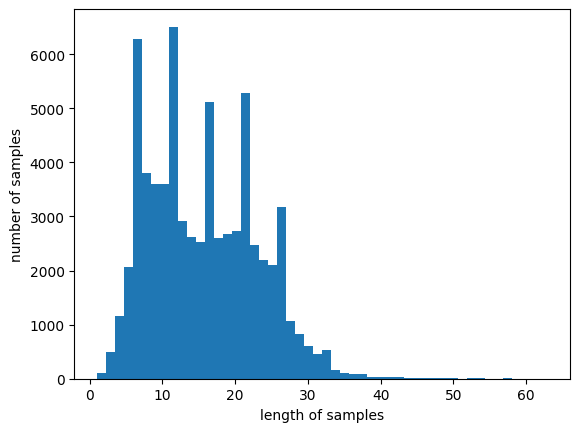

In [183]:
import matplotlib.pyplot as plt

print('최대 길이 :',max(len(review) for review in X_train))
print('평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [184]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [185]:
max_len = 50
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 50 이하인 샘플의 비율: 99.94869464518682


In [186]:
X_train = pad_sequences(X_train, maxlen=max_len)

In [187]:
len(X_train)
len(y_train)

68219

In [188]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [189]:
y_train = y_train.astype(int)

In [190]:
pd.Series(y_train).value_counts()

1    14908
0    14831
3    14675
2    14456
4     9349
dtype: int64

In [191]:
num = np.unique(y_train, axis=0)
num = num.shape[0]
one_hot_y_train = np.eye(num)[y_train]
one_hot_y_train

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [296]:
embedding_dim = 210
hidden_units = 250

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(5, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, one_hot_y_train, epochs=50, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/50
853/853 [==============================] - ETA: 0s - loss: 1.1742 - acc: 0.5201
Epoch 1: val_acc improved from -inf to 0.32622, saving model to best_model.h5
853/853 [==============================] - 587s 685ms/step - loss: 1.1742 - acc: 0.5201 - val_loss: 1.4971 - val_acc: 0.3262
Epoch 2/50
853/853 [==============================] - ETA: 0s - loss: 0.9868 - acc: 0.6156
Epoch 2: val_acc improved from 0.32622 to 0.33546, saving model to best_model.h5
853/853 [==============================] - 517s 606ms/step - loss: 0.9868 - acc: 0.6156 - val_loss: 1.4852 - val_acc: 0.3355
Epoch 3/50
853/853 [==============================] - ETA: 0s - loss: 0.9057 - acc: 0.6498
Epoch 3: val_acc improved from 0.33546 to 0.33839, saving model to best_model.h5
853/853 [==============================] - 511s 600ms/step - loss: 0.9057 - acc: 0.6498 - val_loss: 1.5081 - val_acc: 0.3384
Epoch 4/50
853/853 [==============================] - ETA: 0s - loss: 0.8261 - acc: 0.6833
Epoch 4: val_acc did 

In [297]:
loaded_model = load_model('best_model.h5')

In [298]:
import re

def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(np.argmax(loaded_model.predict(pad_new), axis=-1)) # 예측
  if score == 0:
    print('불안')
  elif score == 1:
    print('분노')
  elif score == 2:
    print('상처')
  elif score == 3:
    print('슬픔')
  elif score == 4:
    print('기쁨')
  # print(f'score = {score}')

In [299]:
test_val_df = pd.read_csv('C:/playdata/DL_miniproject/deeplearning_mini_pj/jiin/emo_/keyword_emotion_sentence_only_validation.csv')
test_val_df

,Unnamed: 0,상황키워드,감정_대분류,사람문장
0,0,"진로,취업,직장",불안,이번 프로젝트에서 발표를 하는데 내가 실수하는 바람에 우리 팀이 감점을 받았어. 너...
1,1,"진로,취업,직장",불안,회사에서 중요한 프로젝트를 혼자 하게 됐는데 솔직히 두렵고 무서워. 나에게 너무 크...
2,2,"진로,취업,직장",불안,상사가 너무 무섭게 생겨서 친해지는 게 너무 두려워. 무섭게 생겼는데도 업무를 보려...
3,3,"진로,취업,직장",불안,이번에 힘들게 들어간 첫 직장이거든. 첫 직장이라서 그런지 너무 긴장된다. 첫 직장...
4,4,"진로,취업,직장",불안,직장에서 동료들이랑 관계가 안 좋아질까 봐 걱정돼. 내가 낯가림이 심해서 친해질 수...
...,...,...,...,...
5588,6631,"연애,결혼,출산",기쁨,남자친구랑 헤어질 뻔했는데 다시 화해했어. 정말 다행이야. 내가 과음하고 실수를 해...
5589,6632,"연애,결혼,출산",상처,나 너무 억울하고 속상한 일이 있어. 피곤해서 남자친구 연락에 대답하지 못하고 잠들...
5590,6633,"연애,결혼,출산",상처,친구 결혼식에 갔었는데 내가 안 온 줄 알고 친구가 토라져서 억울해! 바쁜 사정이 ...
5591,6634,"연애,결혼,출산",상처,나는 결혼을 안 하는 건데 주변에서는 결혼을 못 하는 거로 생각해. 강하게 나서서 ...


In [300]:
test_val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5593 entries, 0 to 5592
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5593 non-null   int64 
 1   상황키워드       5593 non-null   object
 2   감정_대분류      5593 non-null   object
 3   사람문장        5593 non-null   object
dtypes: int64(1), object(3)
memory usage: 174.9+ KB


In [302]:
test_list = []
for sentence in tqdm(test_val_df['사람문장']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    test_list.append(stopwords_removed_sentence)

100%|██████████| 5593/5593 [00:22<00:00, 254.15it/s]


In [303]:
X_test = tokenizer.texts_to_sequences(test_list)
X_test = pad_sequences(X_test, maxlen=max_len)

In [304]:
y_pred = loaded_model.predict(X_test)

175/175 [==============================] - 8s 46ms/step


In [305]:
tmp = np.argmax(model.predict(X_test), axis=-1) # 예측

175/175 [==============================] - 8s 42ms/step


In [306]:
test_val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5593 entries, 0 to 5592
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5593 non-null   int64 
 1   상황키워드       5593 non-null   object
 2   감정_대분류      5593 non-null   object
 3   사람문장        5593 non-null   object
dtypes: int64(1), object(3)
memory usage: 174.9+ KB


In [307]:
test_val_df['추정_감정_대분류'] = pd.DataFrame(tmp)

In [308]:
test_val_df['추정_감정_대분류'].value_counts()

1    1298
0    1243
4    1113
2    1023
3     916
Name: 추정_감정_대분류, dtype: int64

In [309]:
def num_to_emo(number):
    if number == 0:
        return '불안'
    elif number == 1:
        return '분노'
    elif number == 2:
        return '상처'
    elif number == 3:
        return '슬픔'
    elif number == 4:
        return '기쁨'

In [310]:
test_val_df['추정_감정_대분류'] = test_val_df['추정_감정_대분류'].apply(num_to_emo)

In [311]:
correct_df = test_val_df[test_val_df['감정_대분류'] == test_val_df['추정_감정_대분류']]

In [312]:
len(correct_df) / len(test_val_df)

0.7048095834078312

In [208]:
test_val_df.to_csv('person12_3.csv', index=False)